## Ensemble Machine Learning Cookbook

In [36]:
#Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
#ML libraries
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [27]:
#Import Boston Housing data
boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [29]:
df = df_boston
df.shape

(506, 14)

In [31]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [34]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [59]:
#All columns into X variable
X = df.iloc[:,0:13]
#Target column in Y 
Y = df.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,  random_state = 1)

In [67]:
#Ensure we declared proper columns
X.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [68]:
#Ensure we declared proper target
Y.head(2)

0    24.0
1    21.6
Name: target, dtype: float64

In [71]:
tree_model = DecisionTreeRegressor(criterion='mse')
bagging_tree_model = BaggingRegressor(tree_model, max_features=1.0, n_estimators =30,  bootstrap=True,
                                      random_state = 1)

In [72]:
bagging_tree_model.fit(X_train, Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=30, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [73]:
bagging_tree_model.score(X_test, Y_test)

0.9065301482303563

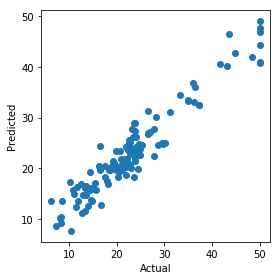

In [75]:
#Predict target on test data
pred = bagging_tree_model.predict(X_test)
#Plot actual and predicted values
plt.figure(figsize=(4,4))
plt.scatter(Y_test, pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()